<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Entanglement*_ 


The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Jay Gambetta, Antonio Córcoles, Andrew Cross, Anna Phan


### Qiskit Package Versions

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.10.3',
 'qiskit-terra': '0.8.1',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.1',
 'qiskit-ibmq-provider': '0.2.2',
 'qiskit-aqua': '0.5.1'}

## Introduction
Many people tend to think quantum physics is hard math, but this is not actually true. Quantum concepts are very similar to those seen in the linear algebra classes you may have taken as a freshman in college, or even in high school. The challenge of quantum physics is the necessity to accept counter-intuitive ideas, and its lack of a simple underlying theory. We believe that if you can grasp the following two Principles, you will have a good start: 
1. A physical system in a definite state can still behave randomly.
2. Two systems that are too far apart to influence each other can nevertheless behave in ways that, though individually random, are somehow strongly correlated.

In this tutorial, we will be discussing the second of these Principles, the first is discussed in [this other tutorial](superposition.ipynb).

In [2]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, IBMQ, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [3]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default

# Uncomment the following lines to run on a real device
# IBMQ.load_accounts()
# from qiskit.backends.ibmq import least_busy
# backend = least_busy(IBMQ.backends(operational=True, simulator=False))
# print("the best backend is " + backend.name())

## Entanglement<a id='section2'></a>

The core idea behind the second Principle is *entanglement*. Upon reading the Principle, one might be inclined to think that entanglement is simply strong correlation between two entitities -- but entanglement goes well beyond mere perfect (classical) correlation. If you and I read the same paper, we will have learned the same information. If a third person comes along and reads the same paper they <i>also</i> will have learned this information. All three persons in this case are perfectly correlated, and they will remain correlated even if they are separated from each other. 

The situation with quantum entanglement is a bit more subtle. In the quantum world, you and I could read the same quantum paper, and yet we will not learn what information is actually contained in the paper until we get together and share our information. However, when we are together, we find that we can unlock more information from the paper than we initially thought possible. Thus, quantum entanglement goes much further than perfect correlation.

To demonstrate this, we will define the controlled-NOT (CNOT) gate and the composition of two systems. The convention we use Qiskit is to label states by writing the first qubit's name in the rightmost position, thereby allowing us to easily convert from binary to decimal. As a result, we define the tensor product between operators $q_0$ and $q_1$ by $q_1\otimes q_0$. 

Taking $q_0$ as the control and $q_1$ as the target, the CNOT with this representation is given by

$$ CNOT =\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix},$$

which is non-standard in the quantum community, but more easily connects to classical computing, where the least significant bit (LSB) is typically on the right. An entangled state of the two qubits can be made via an $H$ gate on the control qubit, followed by the CNOT gate. This generates a particular maximally entangled two-qubit state known as a Bell state, named after John Stewart Bell ([learn more about Bell and his contributions to quantum physics and entanglement](https://en.wikipedia.org/wiki/John_Stewart_Bell)). 


To explore this, we can prepare an entangled state of two qubits, and then ask questions about the qubit states. The questions we can ask are:
* What is the state of the first qubit in the standard basis?
* What is the state of the first qubit in the superposition basis?
* What is the state of the second qubit in the standard basis?
* What is the state of the second qubit in the superposition basis?
* What is the state of both qubits in the standard basis?
* what is the state of both qubits in the superposition basis?

Below is a program with six such circuits for these six questions.

In [4]:
# Creating registers
q2 = QuantumRegister(2)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(2)

# quantum circuit to make an entangled bell state 
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])

# quantum circuit to measure q0 in the standard basis
measureIZ = QuantumCircuit(q2, c1)
measureIZ.measure(q2[0], c1[0])
bellIZ = bell+measureIZ

# quantum circuit to measure q0 in the superposition basis 
measureIX = QuantumCircuit(q2, c1)
measureIX.h(q2[0])
measureIX.measure(q2[0], c1[0])
bellIX = bell+measureIX

# quantum circuit to measure q1 in the standard basis
measureZI = QuantumCircuit(q2, c1)
measureZI.measure(q2[1], c1[0])
bellZI = bell+measureZI

# quantum circuit to measure q1 in the superposition basis 
measureXI = QuantumCircuit(q2, c1)
measureXI.h(q2[1])
measureXI.measure(q2[1], c1[0])
bellXI = bell+measureXI

# quantum circuit to measure q in the standard basis 
measureZZ = QuantumCircuit(q2, c2)
measureZZ.measure(q2[0], c2[0])
measureZZ.measure(q2[1], c2[1])
bellZZ = bell+measureZZ

# quantum circuit to measure q in the superposition basis 
measureXX = QuantumCircuit(q2, c2)
measureXX.h(q2[0])
measureXX.h(q2[1])
measureXX.measure(q2[0], c2[0])
measureXX.measure(q2[1], c2[1])
bellXX = bell+measureXX

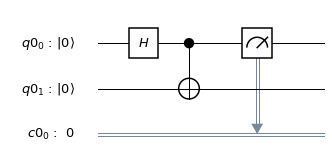

In [5]:
bellIZ.draw(output='mpl')

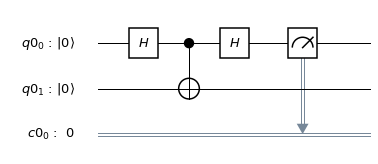

In [6]:
bellIX.draw(output='mpl')

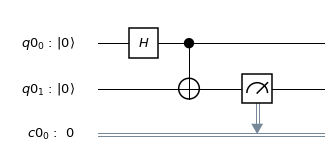

In [7]:
bellZI.draw(output='mpl')

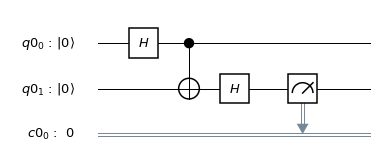

In [8]:
bellXI.draw(output='mpl')

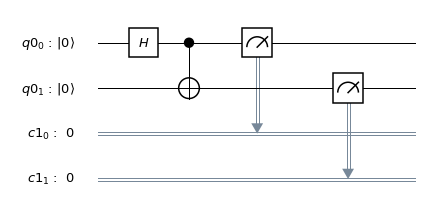

In [9]:
bellZZ.draw(output='mpl')

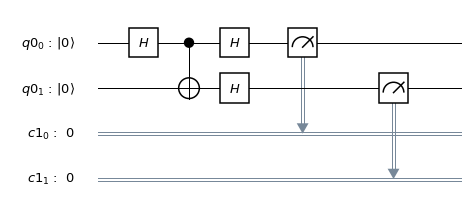

In [10]:
bellXX.draw(output='mpl')

Let's begin by running just the first two questions, looking at the results of the first qubit ($q_0$) using a computational and then a superposition measurement.

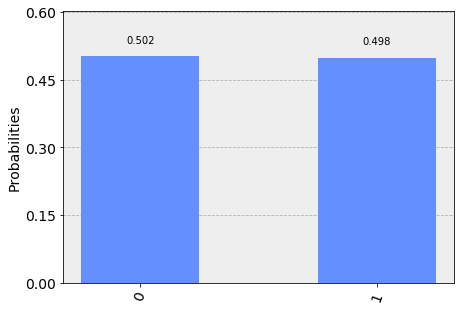

In [11]:
circuits = [bellIZ,bellIX,bellZI,bellXI,bellZZ,bellXX]
job = execute(circuits, backend)
result = job.result()

plot_histogram(result.get_counts(bellIZ))

In [12]:
result.get_counts(bellIZ)

{'0': 514, '1': 510}

We find that the result is random. Half the time $q_0$ is in  $|0\rangle$, and the other half it is in the $|1\rangle$ state. You may wonder whether this is like the superposition from earlier in the tutorial. Maybe the qubit has a perfectly definite state, and we are simply measuring in another basis.  What would you expect if you did the experiment and measured in the superposition basis? Recall we do this by adding an $H$ gate before the measurement...which is exactly what we have checked with the second question.

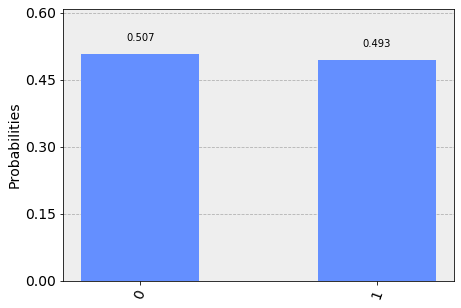

In [13]:
plot_histogram(result.get_counts(bellIX))

In this case, we see that the result is still random, regardless of whether we measure in the computational or the superposition basis. This tells us that we actually know nothing about the first qubit. What about the second qubit, $q_1$? The next lines will run experiments measuring the second qubit in both the computational and superposition bases.

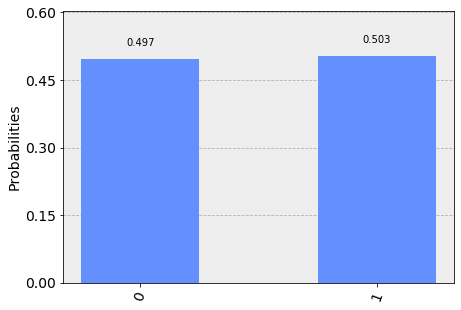

In [14]:
plot_histogram(result.get_counts(bellZI))

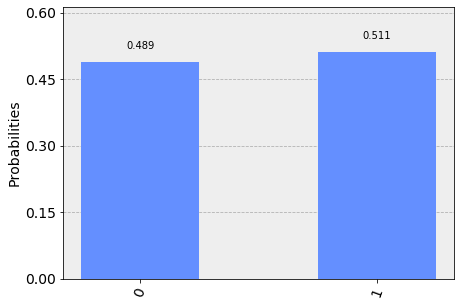

In [15]:
plot_histogram(result.get_counts(bellXI))

Once again, all the experiments give random outcomes. It seems we know nothing about either qubit in our system! In our previous analogy, this is equivalent to two readers separately reading a quantum paper and extracting no information whatsoever from it on their own.

What do you expect, however, when the readers get together?  Below we will measure both in the joint computational basis. 

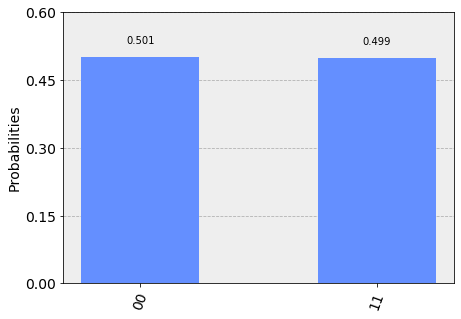

In [16]:
plot_histogram(result.get_counts(bellZZ))

Here we see that with high probability, if $q_0$ is in state 0, $q_1$ will be in 0 as well; the same goes if $q_0$ is in state 1. They are perfectly correlated.

What about if we measure both in the superposition basis?  

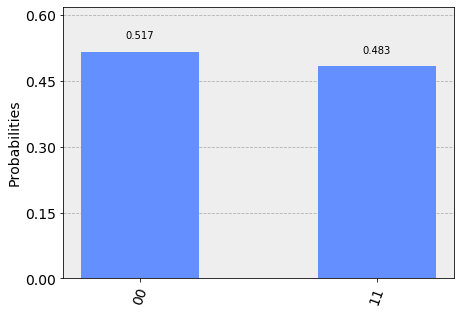

In [17]:
plot_histogram(result.get_counts(bellXX))

Here we see that the system **also** has perfect correlations (accounting for experimental noise). Therefore, if $q_0$ is measured in state $|0\rangle$, we know $q_1$ is in this state as well; likewise, if $q_0$ is measured in state $|+\rangle$, we know $q_1$ is also in this state. These correlations have led to much confusion in science, because any attempt to relate the unusual behavior of quantum entanglement to our everyday experiences is a fruitless endeavor. 

Finally, we need to point out that having correlated outcomes does not necessarily imply that what we are observing is an entangled state. What would we observe, for example, if we prepared half of our shots in the $|00\rangle$ state and half of the shots in the $|11\rangle$ state? Let's have a look

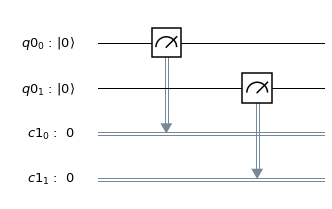

In [18]:
# quantum circuit to make a mixed state 
mixed1 = QuantumCircuit(q2, c2)
mixed2 = QuantumCircuit(q2, c2)
mixed2.x(q2)
mixed1.measure(q2[0], c2[0])
mixed1.measure(q2[1], c2[1])
mixed2.measure(q2[0], c2[0])
mixed2.measure(q2[1], c2[1])

mixed1.draw(output='mpl')

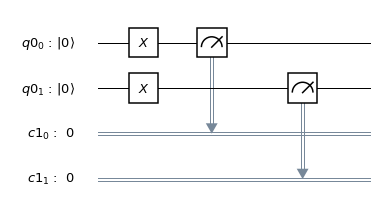

In [19]:
mixed2.draw(output='mpl')

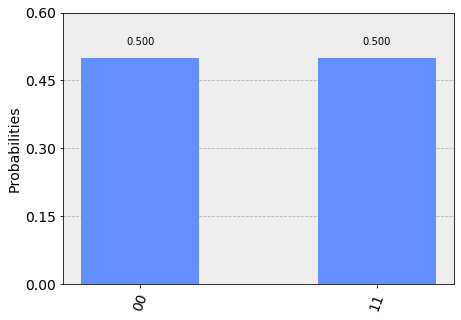

In [20]:
mixed_state = [mixed1,mixed2]
job = execute(mixed_state, backend)
result = job.result()

counts1 = result.get_counts(mixed_state[0])
counts2 = result.get_counts(mixed_state[1])

from collections import Counter
ground = Counter(counts1)
excited = Counter(counts2)
plot_histogram(ground+excited)

We do see the same kind of correlation indeed as we observed in the "bell_measureZZ" circuit. But we know this is not an entangled state! All we have done is leave the qubits in their ground state for some of the shots and flip both qubits for some of the shots. This is called a mixed state and it is a classical state. Now, would we observe a similar outcome if we measured this mixed state in the superposition basis? We will leave this for the reader to try.

This is just a taste of what happens in the quantum world with multi-qubit states. Please continue to [Testing Entanglement](entanglement_testing.ipynb) to explore further!